In [6]:
!pip3 install wget

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=ce3ef5f4069abd7d957bdf90f1a9c858bb8874ce111c23a1943be96a36eeb5c1
  Stored in directory: /Users/minhquang/Library/Caches/pip/wheels/8a/b8/04/0c88fb22489b0c049bee4e977c5689c7fe597d6c4b0e7d0b6a
Successfully built wget


In [123]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import psutil
import time

In [111]:
image = cv2.imread('./img/chessboard.jpg')

In [112]:
grey_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [113]:
grey_img.shape

(1350, 2400)

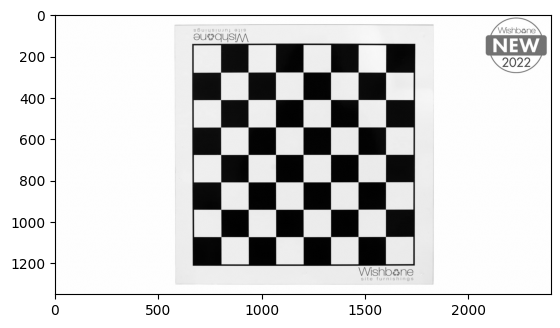

In [114]:
plt.gray()
plt.imshow(grey_img)

In [80]:
def getCoord(kernel):
    center = [1, 1]
    xRows = [-1, -1, -1, 0, +1, +1, +1, 0]
    yRows = [-1, 0, +1, +1, +1,  0, -1, -1]
    for k in range (8):
        pixel_in_filter_x = center[0] + xRows[k]
        pixel_in_filter_y = center[1] + yRows[k]
        print('cor {} {} - value: {}'.format(pixel_in_filter_x, pixel_in_filter_y, kernel[pixel_in_filter_x, pixel_in_filter_y]))

In [116]:
def conv(grey_img, kernel):
    transformed = np.copy(grey_img)
    n = transformed.shape[0]
    m = transformed.shape[1]
    
    for i in range (1, n - 1):
        for j in range (1, m - 1):
            center_item = [i, j]
            center_filter = [1, 1]
            xRows = [-1, -1, -1, 0, +1, +1, +1, 0]
            yRows = [-1, 0, +1, +1, +1,  0, -1, -1]
            new_value = 0.0
            for k in range (8):
                item = [xRows[k], yRows[k]]
                pixel_in_image_x = center_item[0] + item[0]
                pixel_in_image_y = center_item[1] + item[1]
                pixel_in_kernel_x = center_filter[0] + item[0]
                pixel_in_kernel_y = center_filter[1] + item[1]
                
                new_value += grey_img[pixel_in_image_x, pixel_in_image_y] * kernel[pixel_in_kernel_x, pixel_in_kernel_y]
            new_value += grey_img[i, j] * kernel[1, 1]
            if new_value < 0:
                new_value = 0
            elif new_value > 255:
                new_value = 255
            
            transformed[i, j] = new_value * 1 # 1 is parameter to config density or bland
    return transformed

In [117]:
sobelX = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobelY = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

In [125]:
result1 = conv(grey_img, sobelX)

In [120]:
result1.shape

(1350, 2400)

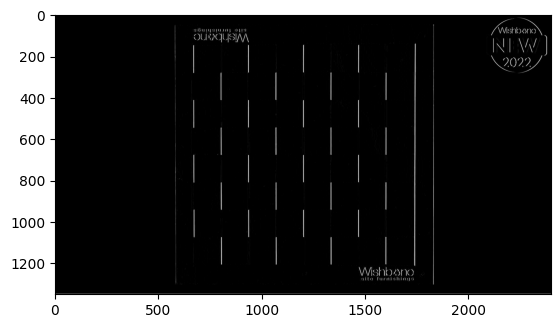

In [108]:
plt.imshow(result1)

In [149]:
def maxPooling(image):
    n = image.shape[0]
    m = image.shape[1]
    xRows = [0, 1, 1]
    yRows = [1, 1, 0]
    new_image = np.zeros((n//2, m//2))
    for i in range(0, n - 1, 2):
        for j in range(0, m - 1, 2):
            block = image[i:i+2, j:j+2]
            new_image[i//2, j//2] = np.max(block)
    return new_image

In [150]:
result2 = maxPooling(result1)

In [152]:
result2.shape

(675, 1200)

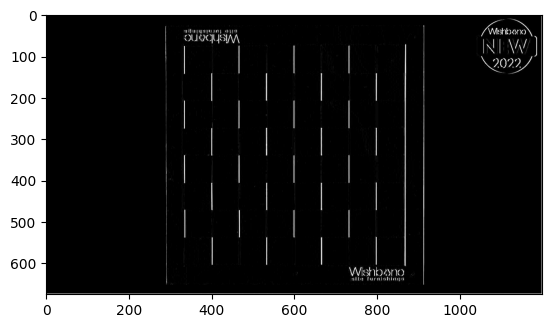

In [151]:
plt.imshow(result2)